### Derivative of a simple function with one input

In [47]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
def f(x):
    return 3*x**2 - 4*x + 5 # 3x^2 - 4x + 5

In [49]:
f(3.0)

20.0

In [50]:
# A set of scalar values to make a numpy array
xs = np.arange(-5, 5, 0.25) # -5 to 5 (not including 5) with steps of 0.25
xs # read as "exes" as in plural of x

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [51]:
ys = f(xs)
ys # read as "ys" as in plural of y

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

#### Plotting this wit matplotlip

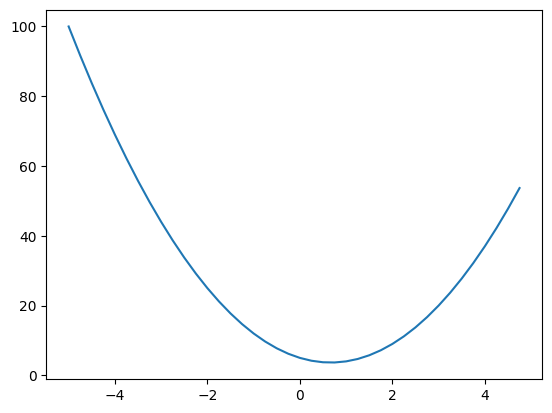

In [52]:
plt.plot(xs, ys) # a nice parabola

#### Evaluating the derivative numerically
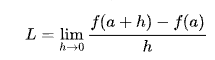

In [53]:
h = 0.000000001 ## that slight change that can manipulate our function
x = 2/3
# f(x + h) - f(x) --> (this is how much our function responded)
(f(x + h) - f(x)) / h # normalizing the rise over run (aka change in y divided by change in x {in this case it's h}), basically the slope! 

# note: h is often called "epsilon"

0.0

#### Getting more complex here

In [54]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [55]:
# what is the derivative of d w.r.t. a, b, and c?
h = 0.00001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c #d1 is a function, we can understand it as f(a,b,c)
a += h
d2 = a*b + c # a is slightly bumped up with h for this

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h) # d2 - d1 is basically how much the function increased when we bumped the input (a) by a tiny amount (h)

d1 4.0
d2 3.9999699999999994
slope -3.000000000064062


This is a numerical derivative. The primary reason for calculating the slope between two functions (or, more precisely, the change in a function's output with respect to a small change in one of its inputs) is to approximate the derivative. In calculus, the derivative of a function at a point measures how the function's output changes as its input changes. This is crucial in many areas, including machine learning, optimization, and numerical analysis.

In the code example, we are calculating a numerical derivative. This approach is often used when:
- The function is too complex to differentiate analytically.
- We want to approximate the derivative for a given set of data points.

Let's take a look at some other changes below:

In [56]:
## bumping b now
h = 0.00001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)

d1 4.0
d2 4.00002
slope 2.0000000000131024


In [57]:
# bumping c
## bumping b now
h = 0.00001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)

d1 4.0
d2 4.00001
slope 0.9999999999621422


### NN from here

#### Building a value object

Here, init and repr are operators in the object. `__init__` is an initializer. `__repr__` means  `printable representation` of the given object.

We need to have a connective tissue of this expression. We need to know and keep pointers about what values produce other values. For this, we introuduce a new variable `_children`, a tuple (for now).

The 'operation' that created the resulting value will be denoted by `_op`. For addition, it will return `+`.

We will also add labels so that we'll know what variables are where. Representation: `label`

In [58]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data # takes a single scalar value that it wraps and keeps track of
        self._prev = set(_children) #_prev is a set
        self._op = _op
        self.label = label

    def __repr__(self): # this is a wrapper. providing us a nicer looking printout.
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') # '+' here is not the + for numbers, it's a floating point + addition
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
# example:
a = Value(data=2.0, label='a')
b = Value(-3.0, label='b')
# a + b is basically doing a.__add__(b) here. Output: Value(data=-1.0)
c = Value (10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L' #output of our graph
L

Value(data=-8.0)

In [59]:
## some scary ass code we don't need to understand for now, for visualization
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

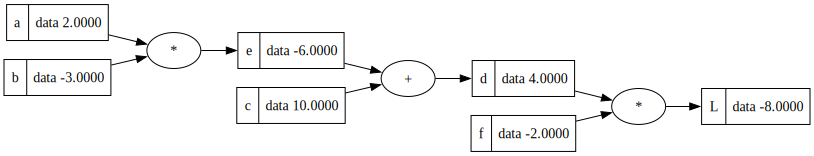

In [60]:
draw_dot(L)

## Backpropagation

The above visualization is visualizing the forward pass (output is -8). 

Now, we want to run backpropagation, esentially start from L, travel the reverse direction, and calculate the gradient of all the intermediate values along the way. 

In other words, for every single intermediate value, we will be calculating the derivative of that node w.r.t. L.

---

We are now going to create a variable inside the Value class that maintains the derivative of L w.r.t. that value. We're adding this as `self.grad = 0` => means the default gradient = 0. Basically initializing the gradient.

In [75]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data # takes a single scalar value that it wraps and keeps track of
        self.grad = 0.0
        self._prev = set(_children) #_prev is a set
        self._op = _op
        self.label = label

    def __repr__(self): # this is a wrapper. providing us a nicer looking printout.
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') # '+' here is not the + for numbers, it's a floating point + addition
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
    # addition of tanh
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out
    
# example:
a = Value(data=2.0, label='a')
b = Value(-3.0, label='b')
# a + b is basically doing a.__add__(b) here. Output: Value(data=-1.0)
c = Value (10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L' #output of our graph
L

Value(data=-8.0)

In [76]:
## Visualizing this
## some scary ass code we don't need to understand for now, for visualization
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

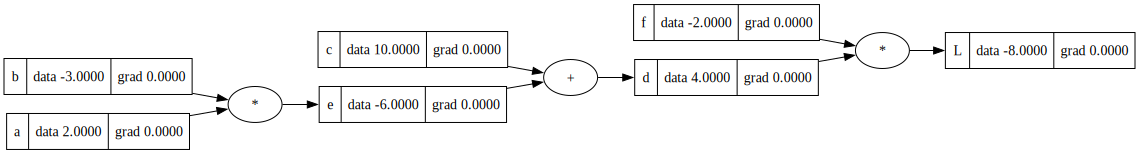

In [77]:
draw_dot(L)

#### Filling in the gradients, manual backpropagation

In [78]:
L.grad = 1 # because L is already the starting point, so derivative is 1 w.r.t. itself, no? yes.

In [79]:
def lol(): # this fn is like a staging area for backprop, the Value class was getting quite long
    h = 0.0001 # adding a small amount of h

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value (10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0 + h, label='a') # adding h to a, measuring the deriative of L w.r.t. a
    b = Value(-3.0, label='b')
    c = Value (10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h) # rise over run (deriative of L w.r.t. a)

lol()

6.000000000021544


---
Now, let's look at the derivatives of L w.r.t. d and f.

L = d * f<br>
we want to know what dL/dd is.

dL/dd = ?

definition of derivative is: (f(x+h) - f(x)) / h

=> ((d+h)*f - d*f / h (by the way, this f is not the f of `fx` used for the derivative notation.)</br> 
=> (d*f + h*f - d*f) / h<br>
=> f

Similarly, dL/df will be just `d`. Gradient for one is basically the value of the other (for d and f).

In [80]:
f.grad = 4.0
d.grad = -2.0 # manually setting

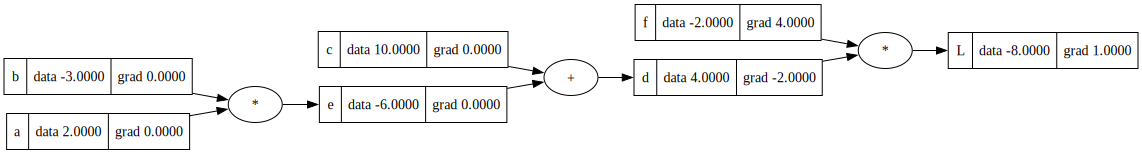

In [81]:
# redrawing what we have again
draw_dot(L)

We can numerically verify the gradients as well by adding h to the individual variables in the `lol()` function. 

#### Most important part for this backpropagation

dL / dc

if we look at the figure, we can see that d affects L directly. c has a direct effect n d as well. which means obviously c has some kind of effect on L (not directly, but there is). How do we now figure out how c impacts L with this info?

---
Let's first try this with `dd/dc`.

d = c + e<br>
so, `dd/dc` is 1.0. ***

In the same manner, `dd/de` is also 1.0.

Let's call these local derivatives.

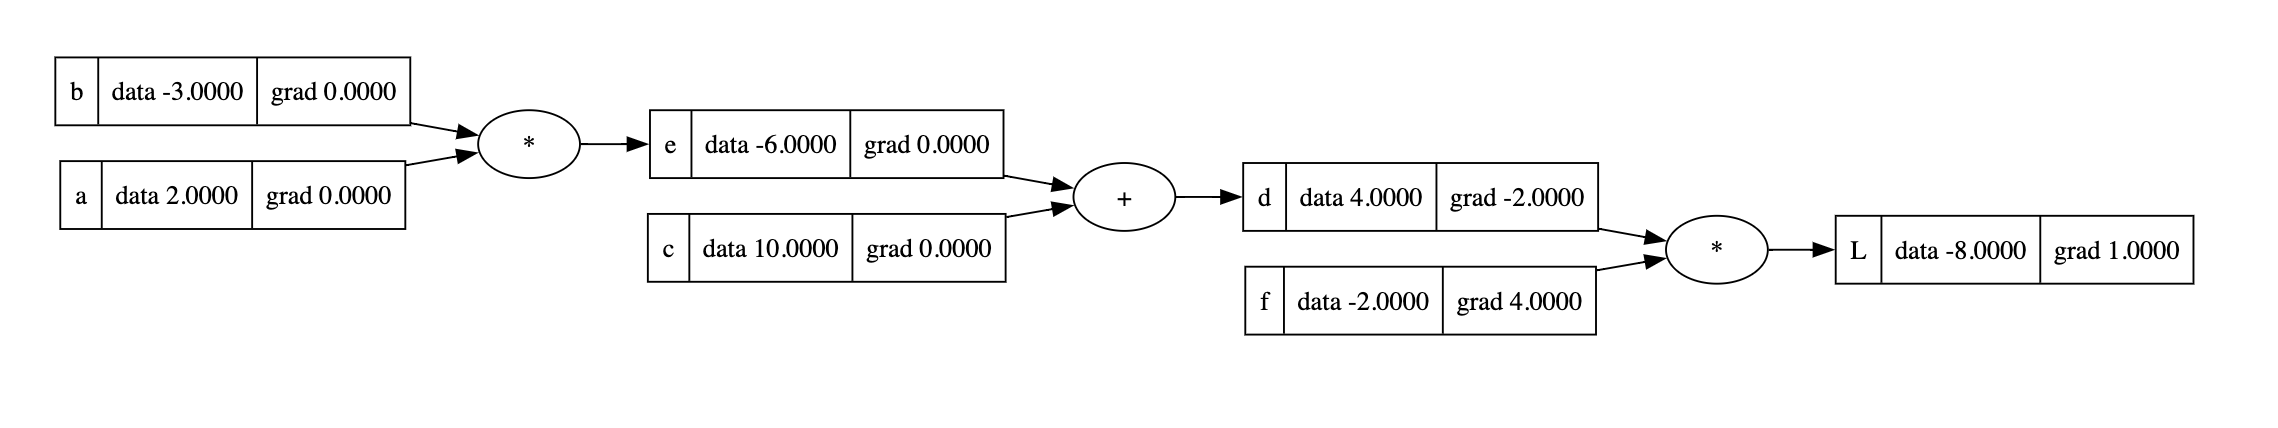

So, we know that L impacts d. We also know that c and e impact d. How do we put this info together?

**Chain Rule**.

$dy/dx = dy/du * du/dx$

And in our case:

WANT:<br>
dL / dc

KNOW:<br>
dL / dd = -2.0 (from the graph)<br>
dd / dc = 1.0 ***

So, the chain rule tells us:

$dL / dc = (dL / dd) * (dd / dc)$

=> -2.0 ($dd/dc$ was 1, so we can even think that: $dL / dc = dL / dd$)

In [82]:
# therefore:
c.grad = -2.0
e.grad = -2.0 # by symmetry (remember that dL / de was also 1.0?)

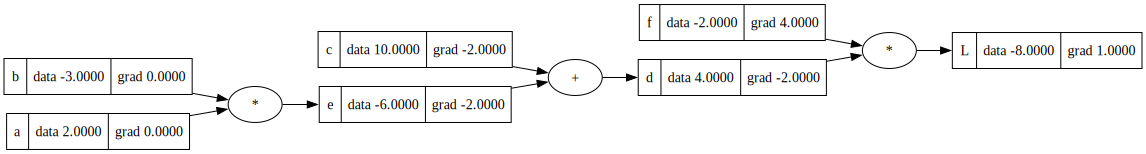

In [83]:
# now let's look at the graph again with these set gradients
draw_dot(L)

#### Recursing our way further backwards (`*`)

WE KNOW:<br>
dL / de = -2.0

WE WANT:<br>
dL / da

This is basically:<br>
$dL / da = (dL / de) * (de / da)$

de / da = ?

we know that: e = a * b

$de / da = d(a * b) / da$<br>
=> b (which is -3.0).

<br>
So,

$dL / da = (dL / de) * (de / da)$

$= (-2.0) * (b)$

$= (-2.0) * (-3.0)$

$= 6.0$

In [84]:
# therefore:
a.grad = (-2.0 * -3.0)
b.grad = (-2.0 * 2.0) #by symmetry

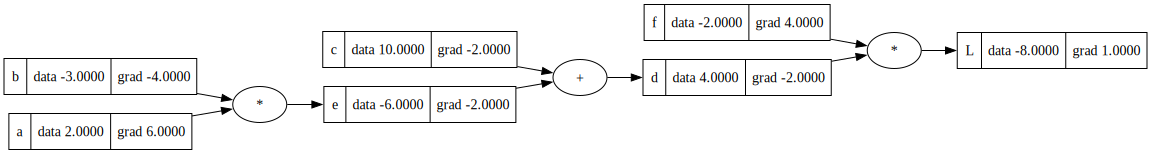

In [85]:
# plotting
draw_dot(L)

This is basically what backpropagation is: iterating through all the nodes starting from the loss function L by locally applying the chain rule. So we just go through and recursively multiply on the local derivatives.

In other words, backpropagation = recursive application of chain rule backwards through the computation graph.

From wiki:
> Backpropagation computes the gradient of a loss function with respect to the weights of the network for a single input–output example, and does so efficiently, computing the gradient one layer at a time, iterating backward from the last layer to avoid redundant calculations of intermediate terms in the chain rule.

---
If we give the leaf nodes (basically the variables) a small nudge towards their gradients, we can expect a directly proportional effect on L. Let's have a look below.

In [86]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.286496


A positive change in L's value brought by adding small fraction of individial leaf nodes' gradients to their initial values.

#### Manual Backpropagation Example #2: **A Neuron**


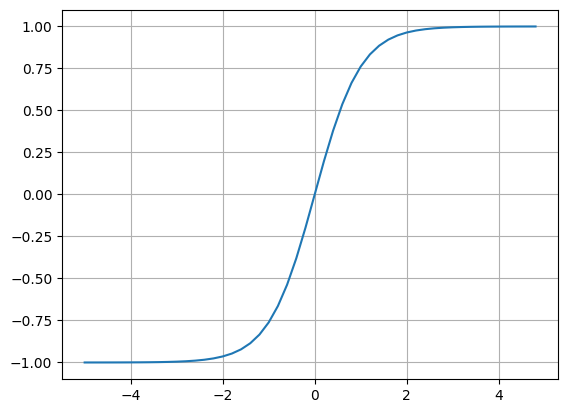

In [87]:
# tanh sample:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid(); 

---
Let's initialize a 2-dimensional neuron below.

In a very high level, a biological neuron can be modeled into an artificial neuron as shown in the figure below (from [cs231n](https://cs231n.github.io/neural-networks-1/)).

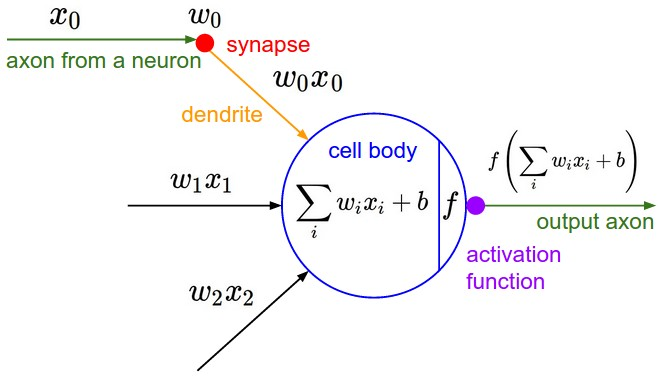

In [92]:
# inputs x1, x2 (a 2-dimensional neuron)
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#weights w1, w2 (like the synaptic strings of a real biological neuron for each input)
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#bias of the neuron
b = Value(6.8813735870195432, label='b')

#basically what we're trying to do here is: x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n' #bascially is the activation without the activation function (if we look at the figure above, we can say n is the 'cell body' without the 'f' (activation function))

o = n.tanh(); o.label = 'o'

Now, let's start our manual backpropagation.

In [97]:
o.grad = 1.0

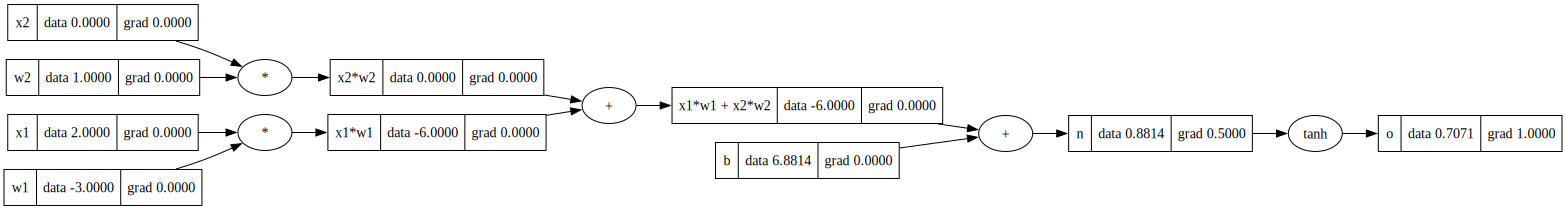

In [100]:
draw_dot(o)

We know that: o = tanh(n)

Derivative of tan(x):

$d(tan(x)/dx) = (1 - tan^2(x))$ 

Therefore:

$ do / dn = 1 - o^2 $

In [99]:
n.grad = 0.5 # 1 - o.data**2 is 0.5

Similarly, as a chain rule:

$ d(o) / d(x1w1x2w2) = (d(o)) / d(n)) * ((d(n)) / d(x1w1x2w2))$

What we know:
d(o) / d(n) = 0.5 (n.grad)

and:

n = x1w1x2w2 + b

So, the chain rule becomes:

=> 0.5 * (d(x1w1x2w2 + b) / d(x1w1x2w2)) $

$= 0.5 * (d(x1w1x2w2)/ d(x1w1x2w2) + d(b) / d(x1w1x2w2)) $

$= 0.5 * ((1) + (0))$

$= 0.5$

Therefore, d(o) / d(x1w1x2w2) = 0.5

Similarly, by symmetry, d(o) / d(b) = 0.5.

Why though? Since o.grad is 1, the `+` node distributes the gradient to both of these equally.

In [101]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

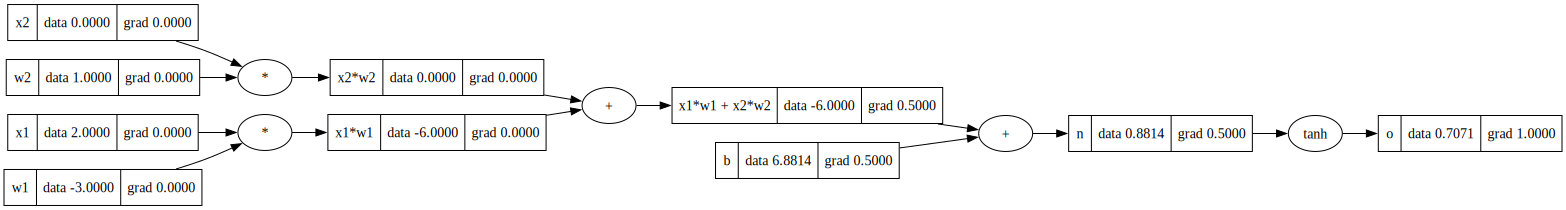

In [102]:
draw_dot(o)

With the exact same logic, the gradients of both x2w2 and x1w1 will be 0.5.

In [103]:
x1w1.grad = 0.5
x2w2.grad = 0.5

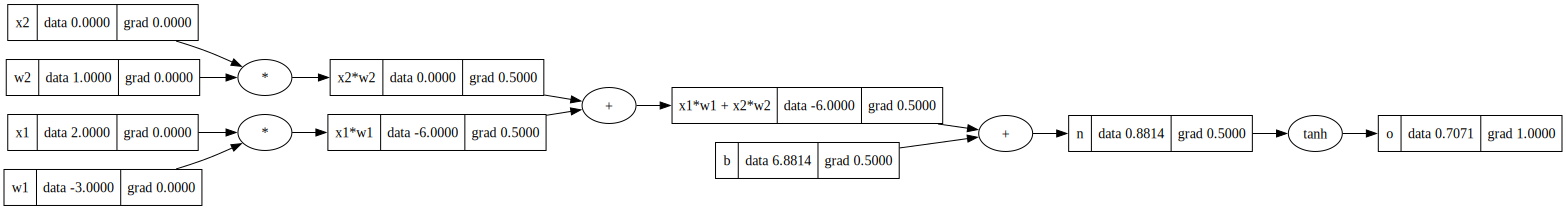

In [104]:
draw_dot(o)

Now finally the `*` nodes! These are slightly different to the `+` node. But basically the same logic as the one we applied in our first backprop example.

x2.grad = ?

it is:

$d(o) / d(x2) = (d(o) / d(x2w2)) * ((d(x2w2)) / d(x2))$

$= 0.5 * w2$

$= 0.5 * 1$

$= 0.5$

In [109]:
#therefore:
x2.grad = x2w2.grad * w2.data

#with the exact same logic,
w2.grad = x2w2.grad * x2.data

x2.grad, w2.grad

(0.5, 0.0)

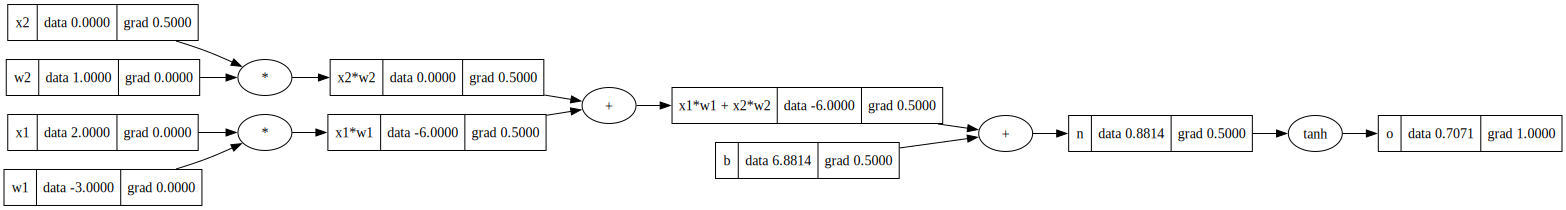

In [108]:
draw_dot(o)

Let's do the same with x1 and w1!

In [110]:
x1.grad = x1w1.grad * w1.data
w1.grad = x1w1.grad * x1.data

x1.grad, w1.grad

(-1.5, 1.0)

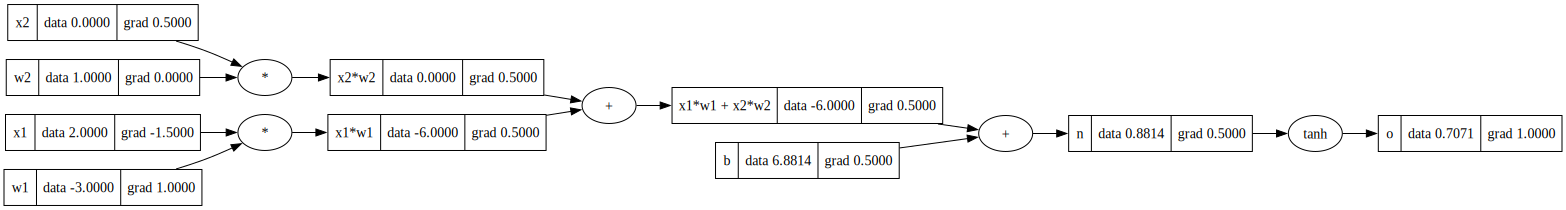

In [111]:
draw_dot(o)